In [1]:
# Computations
import numpy as np
import pandas as pd
import copy
import random

# Imputing Data
from sklearn.impute import SimpleImputer

# plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing Data in Python

* [Dealing with Missing Data](#Dealing-with-Missing-Data)
    * [Imputing missing values using the mean strategy](#Imputing-missing-values-using-the-mean-strategy)
    * [Imputing missing values using the median strategy](#Imputing-missing-values-using-the-median-strategy)
    * [Imputing missing values using the most frequent strategy](#Imputing-missing-values-using-the-most-frequent-strategy)
    * [Comparing the strategies](#Comparing-the-strategies)

Consider the [advertising example](https://hatefdastour.github.io/files/Statistical_Learning/Linear_Regression.html) again.

In [2]:
df = pd.read_csv('../Data/Advertising.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

We are going to randomly add **NaN** values to the data, and call the resulting data the corrupted data.

In [3]:
dfC=copy.deepcopy(df)
# nr: the number of rows
# nc: the number of columns
[nr,nc]=np.shape(dfC)
# Corrupting 20 cells
N_corrupted=20
for i in range(N_corrupted):
    dfC.iloc[[random.randint(1,nr-1)],[random.randint(1,nc-1)]]=np.nan

In [4]:
# the corrupted data
dfC.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3        NaN   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

As can be seen, some of the data are in forms of *NaN*. NaN stands for *Not a Number*. Thus, we need to preprocess the data in order to analyze them using statistical tools.

## Dealing with Missing Data

We can use the [[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)] for imputing missing values. This can be done by a provided constant value or using the statistics (mean, median or mode (most frequent)) of each column.

### Imputing missing values using the mean strategy

First, we are going to implement SimpleImputer with the mean strategy.

In [5]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
## imputing the data
X=imp_mean.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mean.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mean=copy.deepcopy(df)
df_imp_mean.iloc[:,:-1]=X
df_imp_mean.iloc[:,-1]=Y
del X, Y
df_imp_mean.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8  69.200000   22.1
1   44.5   39.3  30.270256   10.4
2   17.2   45.9  69.300000    9.3
3  151.5   41.3  58.500000   18.5
4  180.8   10.8  58.400000   12.9

Thus, we have managed to impute those NaN values using SimpleImputer with the mean strategy. Now we can analyze it using statistical tools.

To compare it with the original Data, we can

In [6]:
df_imp_mean.where(df_imp_mean.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True      False   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Imputing missing values using the median strategy

Next, we can implement try the median strategy.

In [7]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
## imputing the data
X=imp_median.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_median.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_median=copy.deepcopy(df)
df_imp_median.iloc[:,:-1]=X
df_imp_median.iloc[:,-1]=Y
del X, Y
df_imp_median.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       25.6   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [8]:
df_imp_median.where(df_imp_median.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True      False   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Imputing missing values using the most frequent strategy

Finally, the most frequent strategy:

In [9]:
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
## imputing the data
X=imp_mf.fit_transform(dfC.iloc[:,:-1].values)
Y=imp_mf.fit_transform(dfC.iloc[:,-1].values.reshape(-1,1))
# Creating a new dataframe
df_imp_mf=copy.deepcopy(df)
df_imp_mf.iloc[:,:-1]=X
df_imp_mf.iloc[:,-1]=Y
del X, Y
df_imp_mf.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3        8.7   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Comparing with the original data:

In [10]:
df_imp_mf.where(df_imp_mf.values==df.values).notna().head()

TV  Radio  Newspaper  Sales
0  True   True       True   True
1  True   True      False   True
2  True   True       True   True
3  True   True       True   True
4  True   True       True   True

### Comparing the strategies

To compare the accuray, we can use the following norm.

$$\max\left(\left| \text{Original}-\text{Imputed Data}\right|\right)$$

In [11]:
# Norm: the mean strategy
np.max(np.abs(df.values-df_imp_mean.values))

54.52974358974359

In [12]:
# Norm: the median frequent strategy
np.max(np.abs(df.values-df_imp_median.values))

59.199999999999996

In [13]:
# Norm: the most frequent strategy
np.max(np.abs(df.values-df_imp_mf.values))

76.1

As can be seen, here, the mean strategy has provided the best results. Although, on a different example, other strategies might perform better than the mean strategy.

Now Plots:

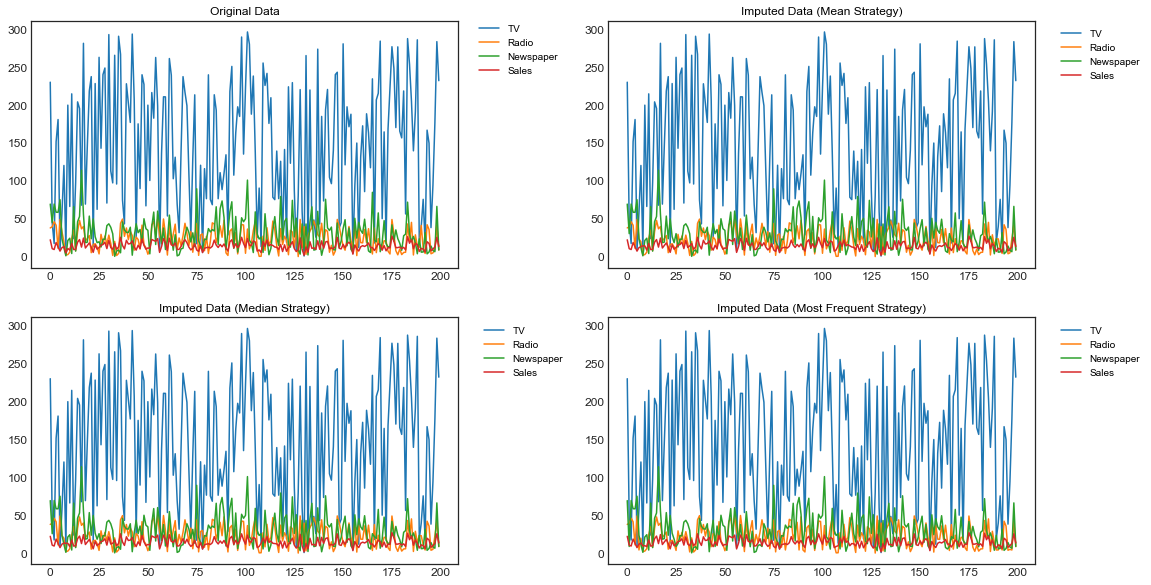

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex=False)
#
_ = df.plot(ax=ax[0,0])
_ = ax[0,0].set_title('Original Data')
_ = ax[0,0].legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
#
_ = df_imp_mean.plot(ax=ax[0,1])
_ = ax[0,1].set_title('Imputed Data (Mean Strategy)')
_ = ax[0,1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#
_ = df_imp_median.plot(ax=ax[1,0])
_ = ax[1,0].set_title('Imputed Data (Median Strategy)')
_ = ax[1,0].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#
_ = df_imp_mf.plot(ax=ax[1,1])
_ = ax[1,1].set_title('Imputed Data (Most Frequent Strategy)')
_ = ax[1,1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.subplots_adjust(wspace=0.35)

***